Perform K-means clustering using following steps:

1. Choose any labelled dataset and remove its labels and keep only features in the dataset.
2. After removing labels, implement k-means clustering using standard libraries.
3. Try different k values in your k-means code and everytime plot the cluster distribution to see whether the clusters are making sense or not.
4. Comment on the homogeneity of your clusters.

In [1]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn

from sklearn.metrics.pairwise import euclidean_distances

# clustering libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# alternative scipy implementation for clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# for scaling numpy array
from sklearn.preprocessing import StandardScaler

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit

In [2]:
def PrintDistMat(gDistMat):
    for i in range(len(gDistMat)):
        for j in range(len(gDistMat[0])):
            sys.stdout.write(str(givenDec(gDistMat[i][j])) + '\t')
        sys.stdout.write('\n')

In [3]:
my_data = pd.read_csv('chip_dataset.csv')

In [4]:
# # convert categorical data to numerical
# my_data["Type"] = my_data["Type"].astype("category").cat.codes

In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [6]:
my_data.describe().T

count         mean           std     min       25%  \
Unnamed: 0             4854.0  2426.500000   1401.373433    0.00  1213.250   
Process Size (nm)      4845.0    55.109598     44.998676    0.00    22.000   
TDP (W)                4228.0    81.359981     76.807808    1.00    33.000   
Die Size (mm^2)        4139.0   188.440445    126.189383    1.00   104.000   
Transistors (million)  4143.0  1929.922279   4044.891098    8.00   154.000   
Freq (MHz)             4854.0  1484.406057   1066.701523  100.00   590.000   
FP16 GFLOPS             536.0  8397.459851  13799.551131   10.02   768.800   
FP32 GFLOPS            1948.0  2134.756653   3898.431487   12.80   257.300   
FP64 GFLOPS            1306.0   363.670511   1145.931856    3.60    38.295   

                           50%       75%       max  
Unnamed: 0             2426.50   3639.75    4853.0  
Process Size (nm)        40.00     90.00     250.0  
TDP (W)                  65.00    100.00     900.0  
Die Size (mm^2)         148.00    239.00     826.0  
Transistors (million)   624.00   1550.00   54200.0  
Freq (MHz)             1073.50   2400.00    4700.0  
FP16 GFLOPS            2965.50  10600.00  184600.0  
FP32 GFLOPS             696.00   2116.75   40000.0  
FP64 GFLOPS              89.28    220.00   11540.0

# fillna

<AxesSubplot:>

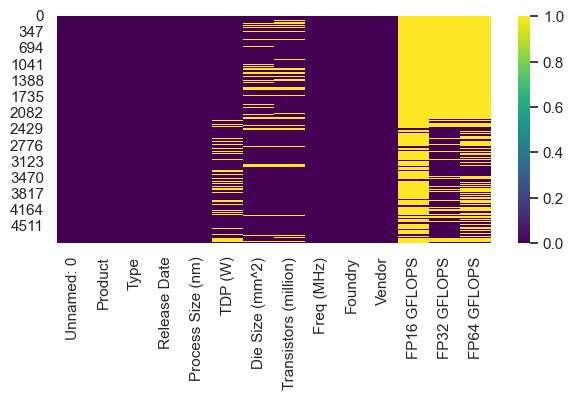

In [7]:
plt.figure(figsize=(my_data.shape[1]/2, 3), dpi=100)
sns.heatmap(my_data.isnull(), cmap="viridis")

<AxesSubplot:>

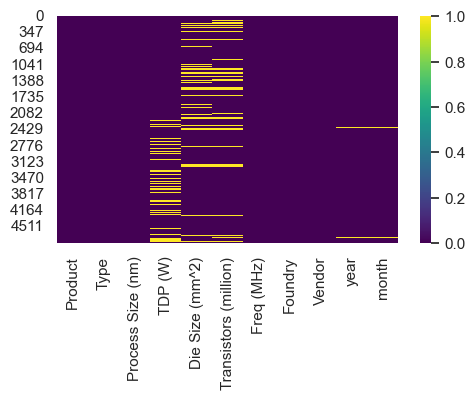

In [8]:
#drop unused column
my_data = my_data.drop(['Unnamed: 0', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'], axis=1)

my_data['year'] = pd.DatetimeIndex(my_data['Release Date']).year
my_data['month'] = pd.DatetimeIndex(my_data['Release Date']).month
my_data = my_data.drop(['Release Date'], axis=1)

plt.figure(figsize=(my_data.shape[1]/2, 3), dpi=100)
sns.heatmap(my_data.isnull(), cmap="viridis")

<AxesSubplot:>

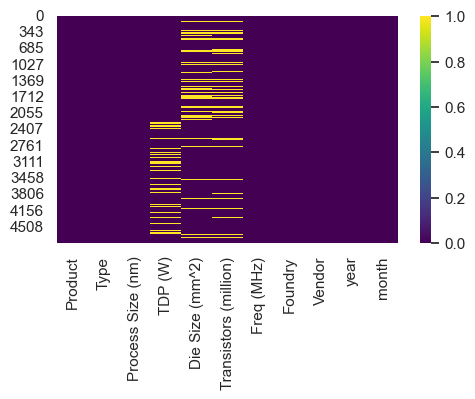

In [9]:
my_data = my_data.drop(my_data[my_data["year"].isnull()].index, axis=0)
plt.figure(figsize=(my_data.shape[1]/2, 3), dpi=100)
sns.heatmap(my_data.isnull(), cmap="viridis")

In [10]:
my_data.columns

Index(['Product', 'Type', 'Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)',
       'Transistors (million)', 'Freq (MHz)', 'Foundry', 'Vendor', 'year',
       'month'],
      dtype='object')

In [11]:
col = "TDP (W)"
median = my_data[col].quantile(0.5)
my_data[col] = my_data[col].fillna(median)

In [12]:
col = "Die Size (mm^2)"
median = my_data[col].quantile(0.5)
my_data[col] = my_data[col].fillna(median)

In [13]:
col = "Transistors (million)"
median = my_data[col].quantile(0.5)
my_data[col] = my_data[col].fillna(median)

In [14]:
col = "Process Size (nm)"
my_data[my_data[col].isnull()]
my_data = my_data.drop(my_data[my_data[col].isnull()].index, axis=0)

Product                  False
Type                     False
Process Size (nm)        False
TDP (W)                  False
Die Size (mm^2)          False
Transistors (million)    False
Freq (MHz)               False
Foundry                  False
Vendor                   False
year                     False
month                    False
dtype: bool


<AxesSubplot:>

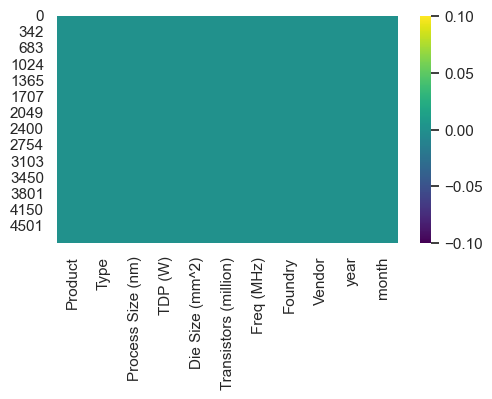

In [15]:
print(my_data.isnull().any())
plt.figure(figsize=(my_data.shape[1]/2, 3), dpi=100)
sns.heatmap(my_data.isnull(), cmap="viridis")

In [16]:
my_data.reset_index(inplace=True, drop=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in my_data.columns:
    if my_data[col].dtype == "object":
        my_data[col] = enc.fit_transform(my_data[col])

# import category_encoders as ce
# from sklearn.preprocessing import RobustScaler
# encoder = ce.OneHotEncoder()
# X_train = encoder.fit_transform(X_train)
# X_test = encoder.transform(X_test)
# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [18]:
my_data.describe().T

count         mean          std     min     25%  \
Product                4773.0  2059.915148  1223.864569     0.0   996.0   
Type                   4773.0     0.541379     0.498337     0.0     0.0   
Process Size (nm)      4773.0    54.939451    44.380328     0.0    22.0   
TDP (W)                4773.0    78.567149    70.769445     1.0    35.0   
Die Size (mm^2)        4773.0   181.376912   115.855941     1.0   111.0   
Transistors (million)  4773.0  1705.802430  3727.677795     8.0   180.0   
Freq (MHz)             4773.0  1496.649906  1068.636556   100.0   600.0   
Foundry                4773.0     4.571129     2.825503     0.0     1.0   
Vendor                 4773.0     1.468887     1.220342     0.0     0.0   
year                   4773.0  2010.798659     5.503476  2000.0  2006.0   
month                  4773.0     5.945527     3.327469     1.0     3.0   

                          50%     75%      max  
Product                2056.0  3131.0   4201.0  
Type                      1.0     1.0      1.0  
Process Size (nm)        40.0    90.0    250.0  
TDP (W)                  65.0    95.0    900.0  
Die Size (mm^2)         148.0   220.0    826.0  
Transistors (million)   585.0  1400.0  54200.0  
Freq (MHz)             1096.0  2400.0   4700.0  
Foundry                   6.0     6.0      8.0  
Vendor                    2.0     3.0      4.0  
year                   2011.0  2015.0   2021.0  
month                     6.0     9.0     12.0

# normalization

In [19]:
# sns.pairplot(my_data, kind="kde")

In [20]:
df = my_data.copy(deep=True)

In [21]:
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler,StandardScaler
def scaling(f, col_idx, action=None, plot=False):
    c = f.columns[col_idx]
    tmp = f[[c]].copy()
    if action == 'log':
        tmp = np.log(tmp + 1)
        color = 'r'
    elif action == 'minmax':
        tmp = MinMaxScaler().fit_transform(tmp)
        color = 'g'
    elif action == 'standard':
        tmp = StandardScaler().fit_transform(tmp)
        color = 'b'
    else:
        color = 'k'

    if plot:
        g = sns.displot(tmp, kde=True, color=color)
        g.fig.set_figwidth(7)
        g.fig.set_figheight(2)
        plt.title("\"%s\" scaling:%s, (min:%.2f, max:%.2f)" % (c, action, tmp.min(), tmp.max()))
        plt.show()
    f[c] = tmp
    return f

In [22]:
# for i in range(len(df.columns)):
#     tmp = scaling(df, i, action=None, plot=True)

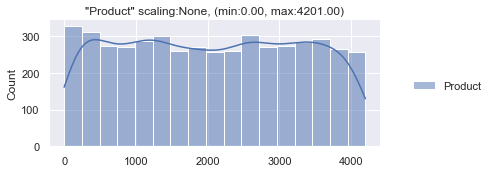

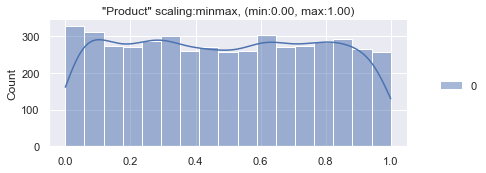

In [23]:
act = 'minmax'
i=0
tmp = scaling(df, i, action=None, plot=True)
tmp = scaling(df, i, action=act, plot=True)

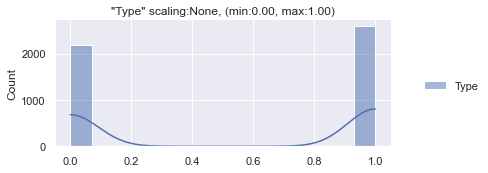

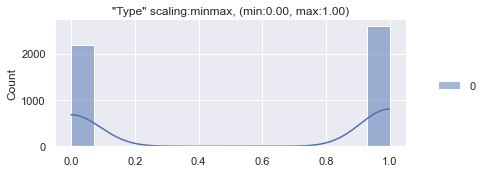

In [24]:
i=1
tmp = scaling(df, i, action=None, plot=True)
tmp = scaling(df, i, action=act, plot=True)

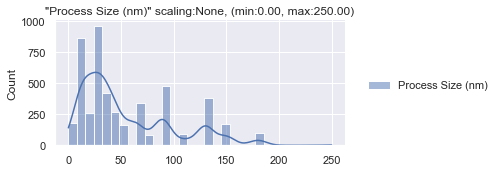

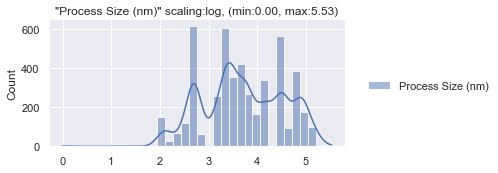

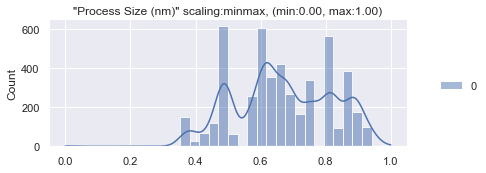

In [25]:
i=2
tmp = scaling(df, i, action=None, plot=True)
tmp = scaling(df, i, action='log', plot=True)
tmp = scaling(df, i, action=act, plot=True)

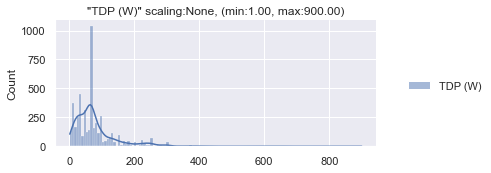

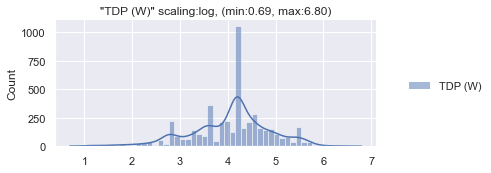

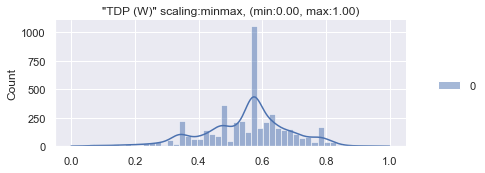

In [26]:
i=3
tmp = scaling(df, i, action=None, plot=True)
tmp = scaling(df, i, action='log', plot=True)
tmp = scaling(df, i, action=act, plot=True)

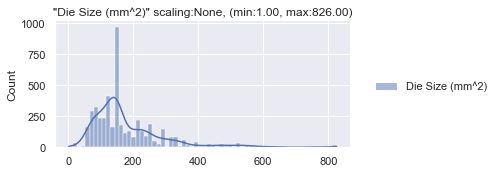

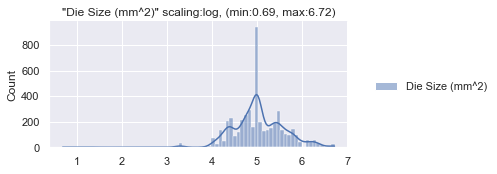

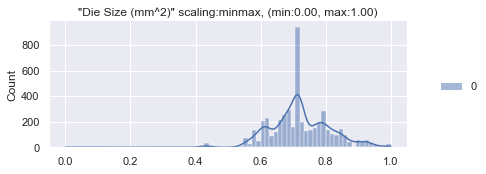

In [27]:
i=4
tmp = scaling(df, i, action=None, plot=True)
tmp = scaling(df, i, action='log', plot=True)
tmp = scaling(df, i, action=act, plot=True)

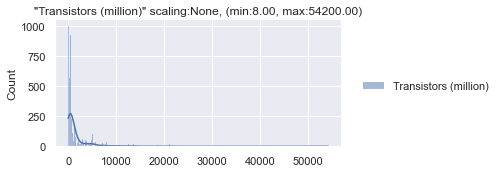

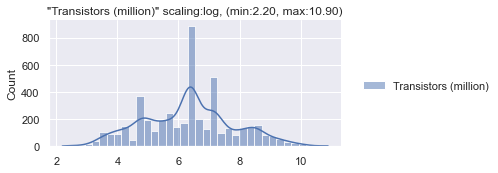

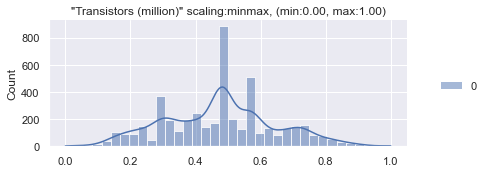

In [28]:
i=5
tmp = scaling(df, i, action=None, plot=True)
tmp = scaling(df, i, action='log', plot=True)
tmp = scaling(df, i, action=act, plot=True)

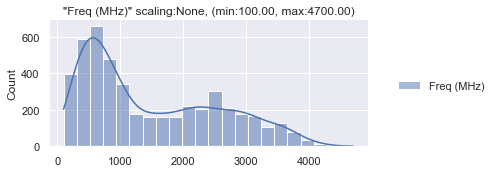

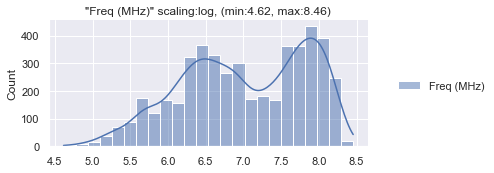

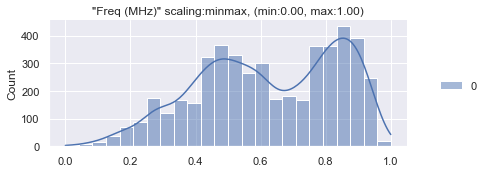

In [29]:
i=6
tmp = scaling(df, i, action=None, plot=True)
tmp = scaling(df, i, action='log', plot=True)
tmp = scaling(df, i, action=act, plot=True)

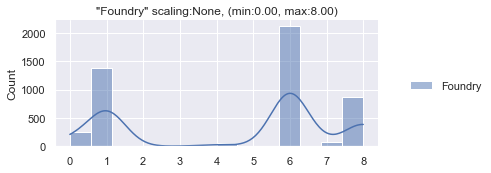

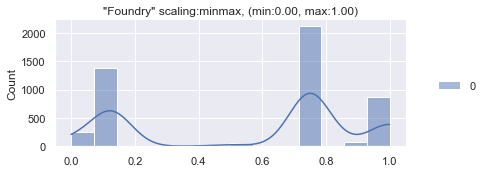

In [30]:
i=7
tmp = scaling(df, i, action=None, plot=True)
tmp = scaling(df, i, action=act, plot=True)

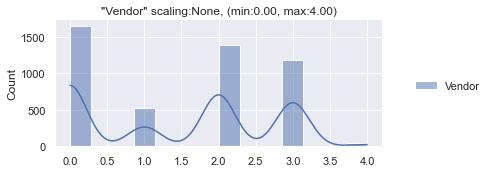

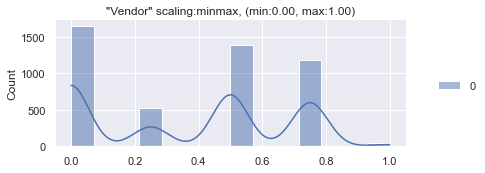

In [31]:
i=8
tmp = scaling(df, i, action=None, plot=True)
tmp = scaling(df, i, action=act, plot=True)

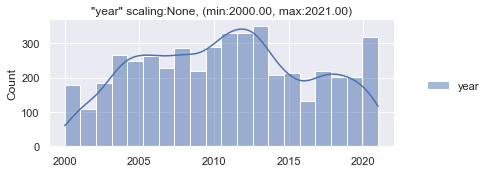

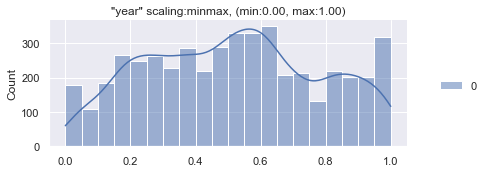

In [32]:
i=9
tmp = scaling(df, i, action=None, plot=True)
tmp = scaling(df, i, action=act, plot=True)

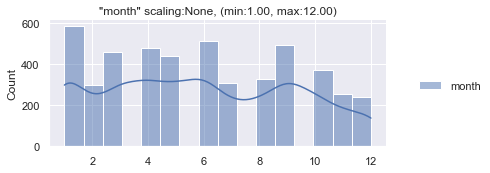

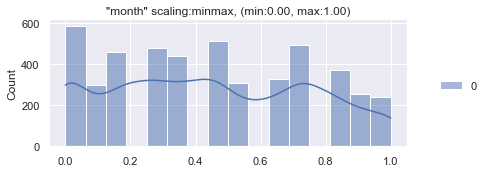

In [33]:
i=10
tmp = scaling(df, i, action=None, plot=True)
tmp = scaling(df, i, action=act, plot=True)

In [34]:
# sns.pairplot(df, kind="kde")

# outlier removal

In [35]:
df_stage1 = df.copy(deep=True)

In [36]:
import random
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.cluster import KMeans

def plot3d(ax, x1, x2, c1):
    ax.scatter3D(x1[:, 0], x1[:, 1], x1[:, 2], c=c1, cmap=plt.cm.Set1, edgecolor="k", s=40, alpha=.5, )
    ax.scatter3D(x2[:, 0], x2[:, 1], x2[:, 2], color='g', marker='x', s=40, alpha=.9, )
    ax.set_title("Visualizations on the first three PCA components")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

def outlier_removal(x, col_y, labels, protected_labels=np.array([]), outliers_fraction=0.01, plot=False):
    r = random.randint(1, 10000)
    if plot:
        print("random_state=%d" % r)
    clf = IsolationForest(random_state=r, max_samples=0.99, bootstrap=False, n_estimators=250, contamination=outliers_fraction)
    tmpdf = x.copy(deep=True)
    tmpdf['result'] = clf.fit_predict(tmpdf) # _predict(tmpdf)
    tmpdf.loc[(tmpdf['result'] == -1) & (tmpdf[col_y].isin(protected_labels)), 'result'] = 1

    if plot:
        f = np.mean(clf.score_samples(x))
        print("\nscorer_f : %.6f, rand_seed: %d" % (f, r))
        px = PCA().fit_transform(tmpdf)
        indices_norm = tmpdf[tmpdf['result'] == 1].index
        indices_iso = tmpdf[tmpdf['result'] == -1].index
        x1 = np.delete(px, indices_iso, axis=0)
        x2 = np.delete(px, indices_norm, axis=0)
        c1 = np.delete(labels, indices_iso)
        
        fig = plt.figure(figsize=(18, 6), dpi=100)
        gs = GridSpec(1, 3, figure=fig)
        ax1 = fig.add_subplot(gs[0, 0], projection='3d', elev=0, azim=0)
        ax2 = fig.add_subplot(gs[0, 1], projection='3d', elev=45, azim=45)
        ax3 = fig.add_subplot(gs[0, 2], projection='3d', elev=90, azim=90)
        
        plot3d(ax1, x1, x2, c1)
        plot3d(ax2, x1, x2, c1)
        plot3d(ax3, x1, x2, c1)

        plt.show()
    return tmpdf.drop(tmpdf[tmpdf['result'] == -1].index, axis=0).drop(['result'], axis=1).reset_index(drop=True)


random_state=6778


/Applications/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



scorer_f : -0.465144, rand_seed: 6778


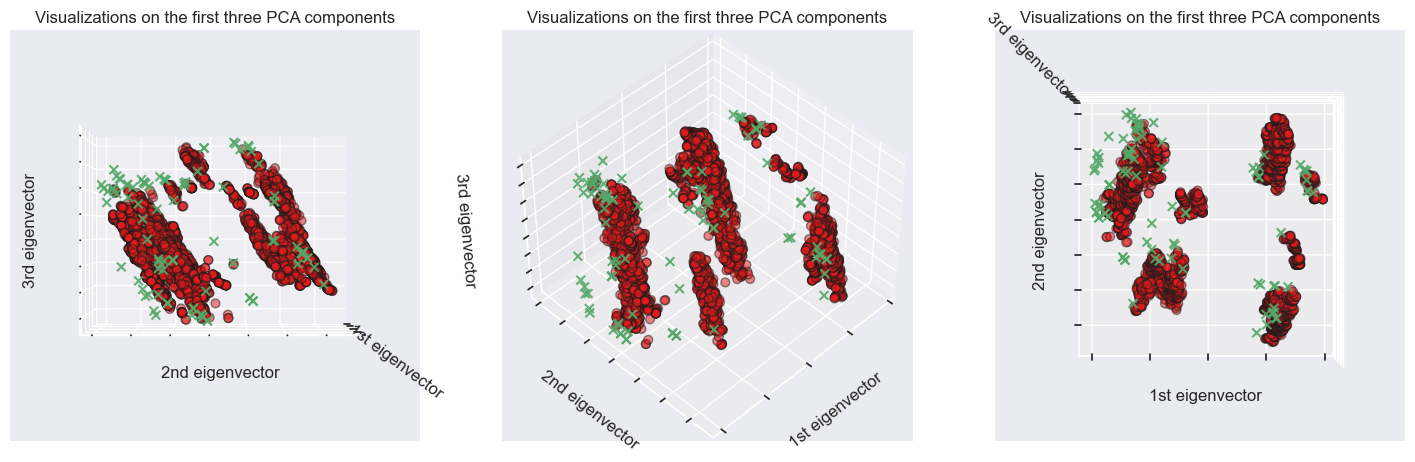

In [37]:
c = [1] * df.shape[0]
df_stage1 = outlier_removal(df_stage1, 'Type', c, protected_labels=np.array([]), outliers_fraction=0.02, plot=True)

# k-means visualization

In [38]:
plt.cm.Set1.with_extremes().colors

((0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6))

In [39]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.cluster import *
def plot3d(ax, x, labels):
    ax.scatter3D(x[:, 0], 
             x[:, 1], 
             x[:, 2],
             c=labels, 
             cmap='prism',
             edgecolor="k",
             s=40,
             alpha=.9
            )
    ax.set_title("Visualizations on the first three PCA components")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

def kmeans_visualization(f, i, tol=0.01, iter=200, init='k-means++', algo='lloyd'):
    px = PCA().fit_transform(f)
    fig = plt.figure(figsize=(18, 18), dpi=100)
    gs = GridSpec(3, 3, figure=fig)
    ax11 = fig.add_subplot(gs[0, 0], projection='3d', elev=0, azim=-45)
    ax12 = fig.add_subplot(gs[0, 1], projection='3d', elev=0, azim=45)
    ax13 = fig.add_subplot(gs[0, 2], projection='3d', elev=0, azim=135)
    ax21 = fig.add_subplot(gs[1, 0], projection='3d', elev=45, azim=-45)
    ax22 = fig.add_subplot(gs[1, 1], projection='3d', elev=45, azim=45)
    ax23 = fig.add_subplot(gs[1, 2], projection='3d', elev=45, azim=135)
    ax31 = fig.add_subplot(gs[2, 0], projection='3d', elev=90, azim=-45)
    ax32 = fig.add_subplot(gs[2, 1], projection='3d', elev=90, azim=45)
    ax33 = fig.add_subplot(gs[2, 2], projection='3d', elev=90, azim=135)

    lbs = KMeans(n_clusters = i, init=init, n_init=10, max_iter=iter, tol=tol, 
                 verbose=0, random_state=0, copy_x=True, algorithm=algo).fit(f).labels_
#     lbs = AgglomerativeClustering(linkage='single', n_clusters=i).fit(f).labels_
#     lbs = SpectralClustering(n_clusters=i).fit(f).labels_
#     lbs = OPTICS(min_samples=5,xi=0.001,min_cluster_size=0.3).fit(f).labels_
#     lbs = DBSCAN(eps=1.5).fit(f).labels_
    
    plot3d(ax11, px, lbs)
    plot3d(ax12, px, lbs)
    plot3d(ax13, px, lbs)
    plot3d(ax21, px, lbs)
    plot3d(ax22, px, lbs)
    plot3d(ax23, px, lbs)
    plot3d(ax31, px, lbs)
    plot3d(ax32, px, lbs)
    plot3d(ax33, px, lbs)

    plt.show()

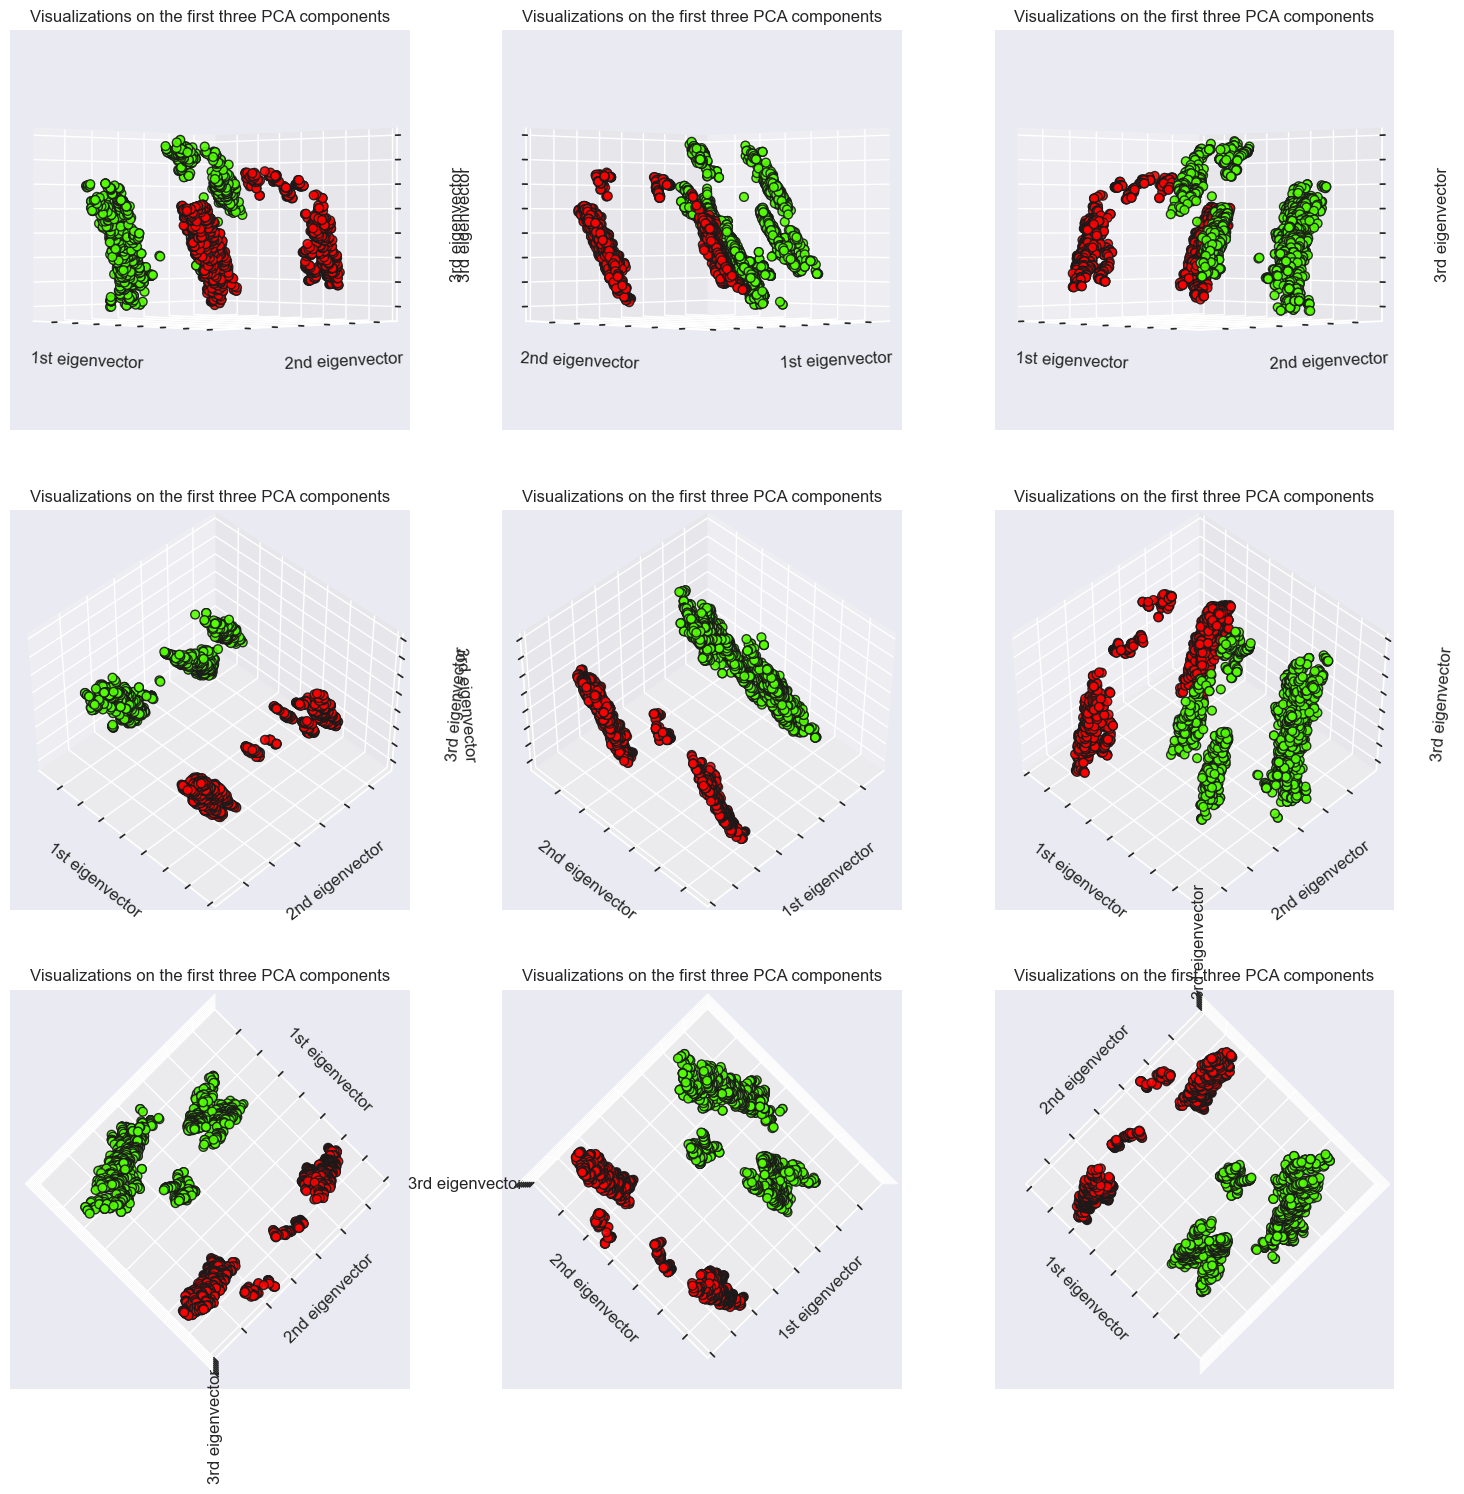

In [40]:
kmeans_visualization(df_stage1, 2)

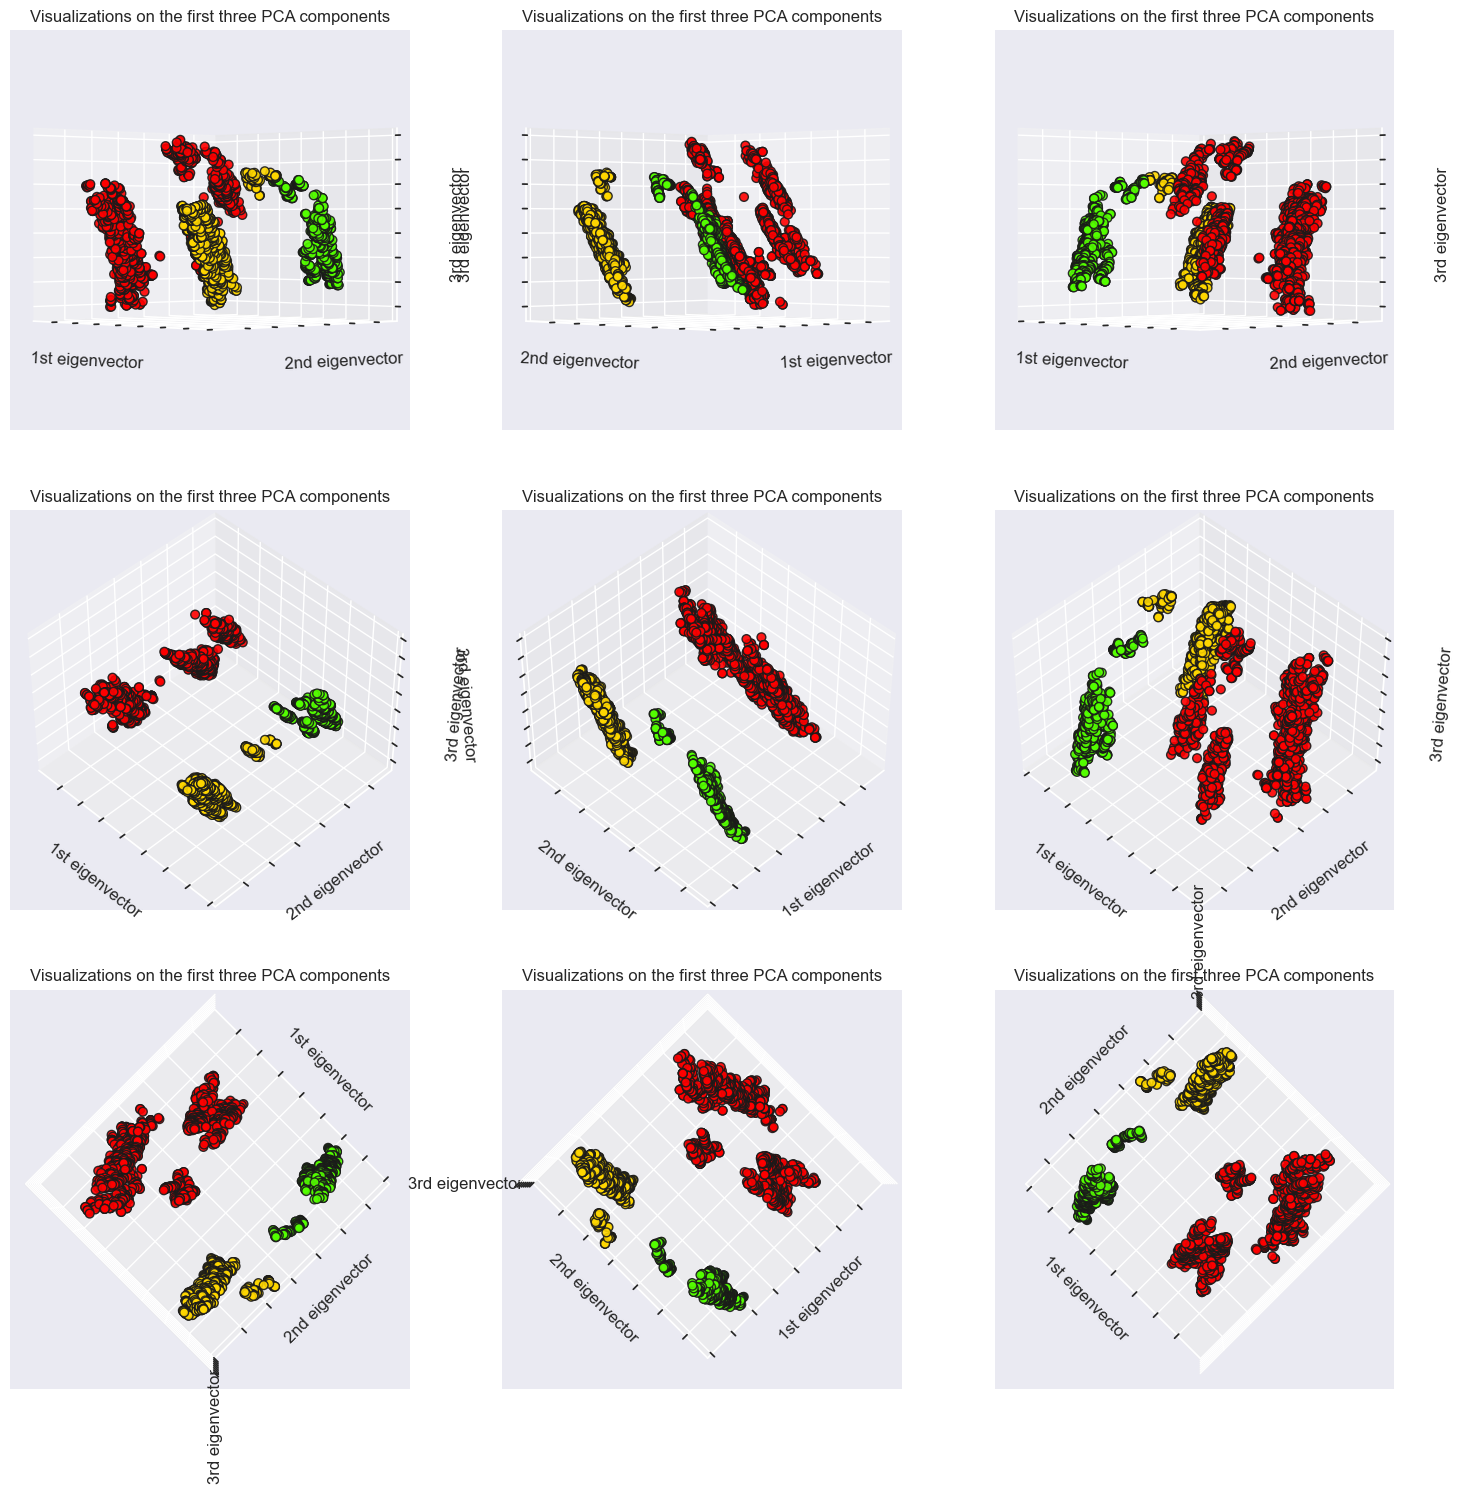

In [41]:
kmeans_visualization(df_stage1, 3)

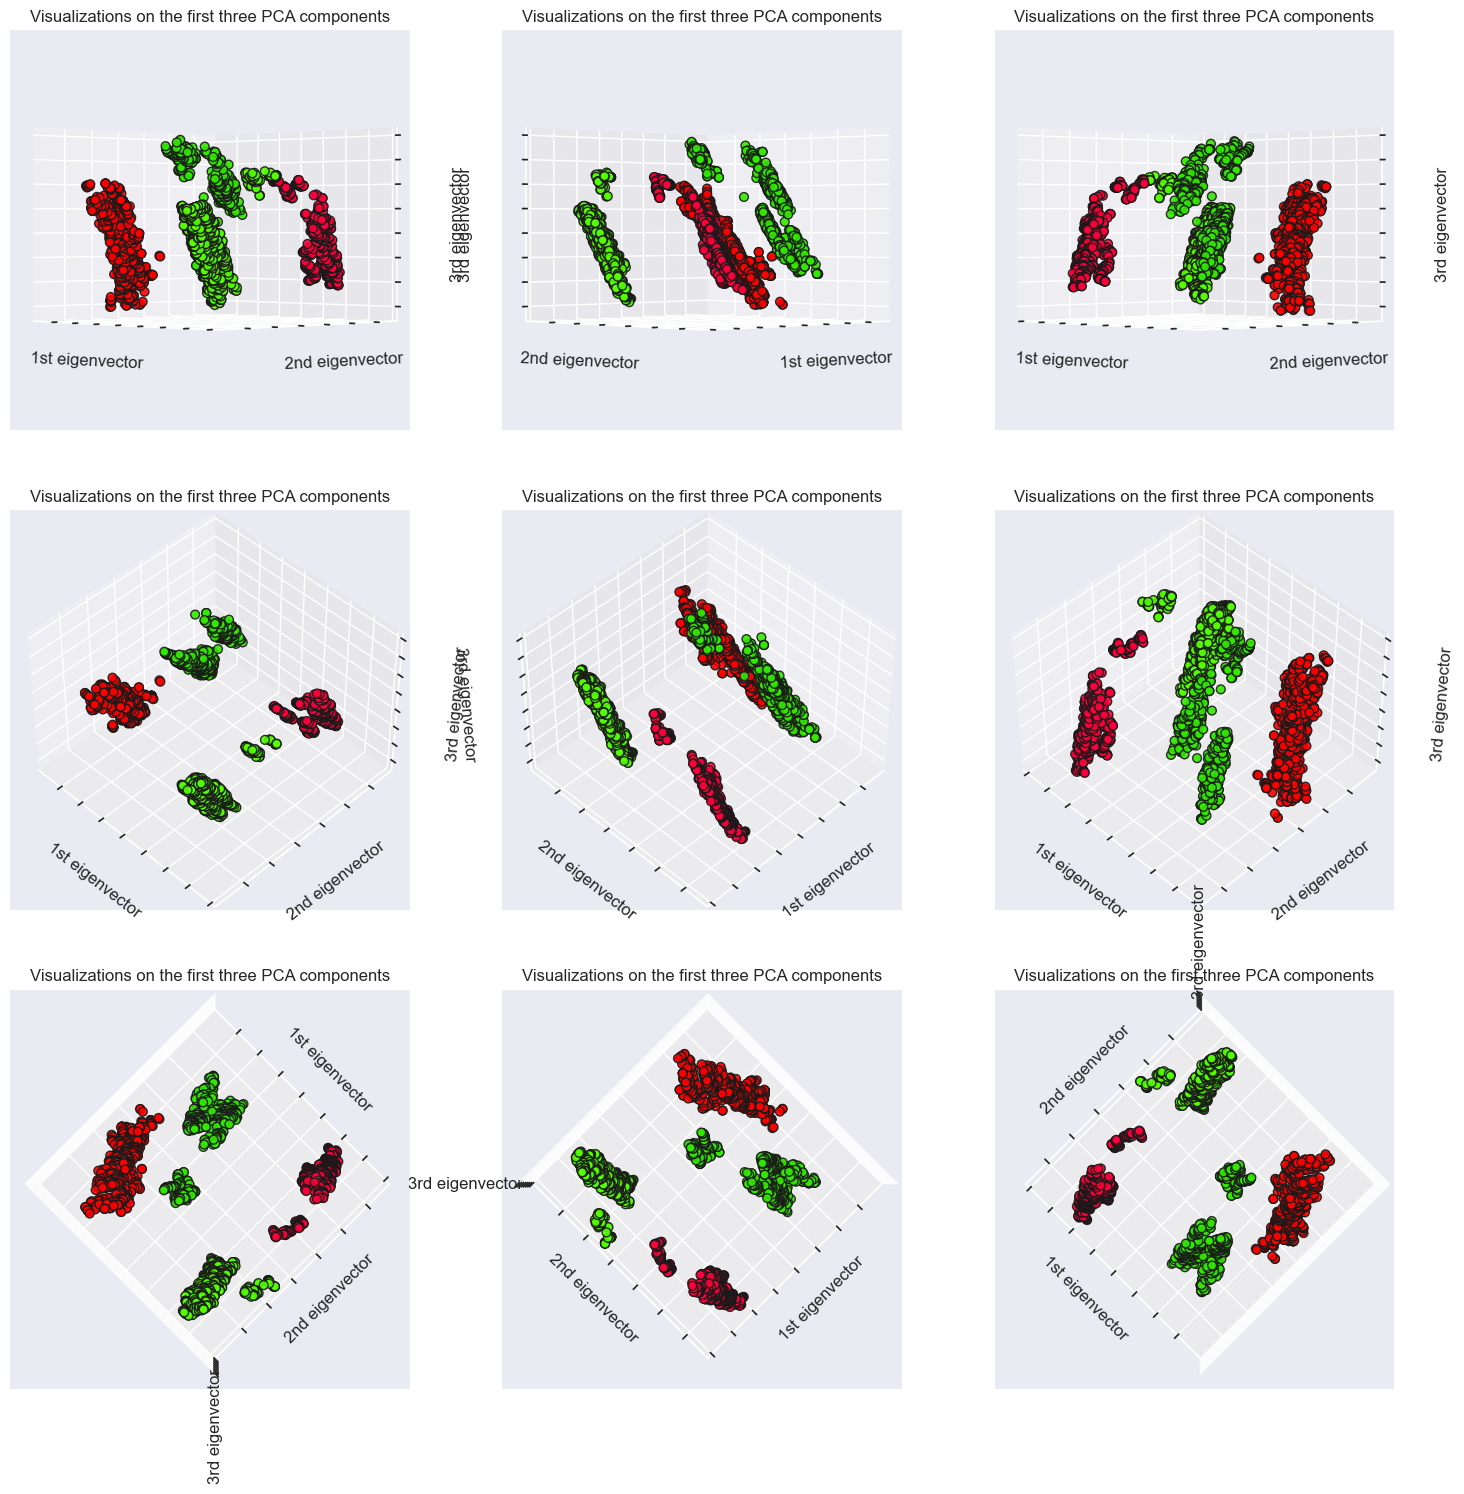

In [42]:
kmeans_visualization(df_stage1, 4)

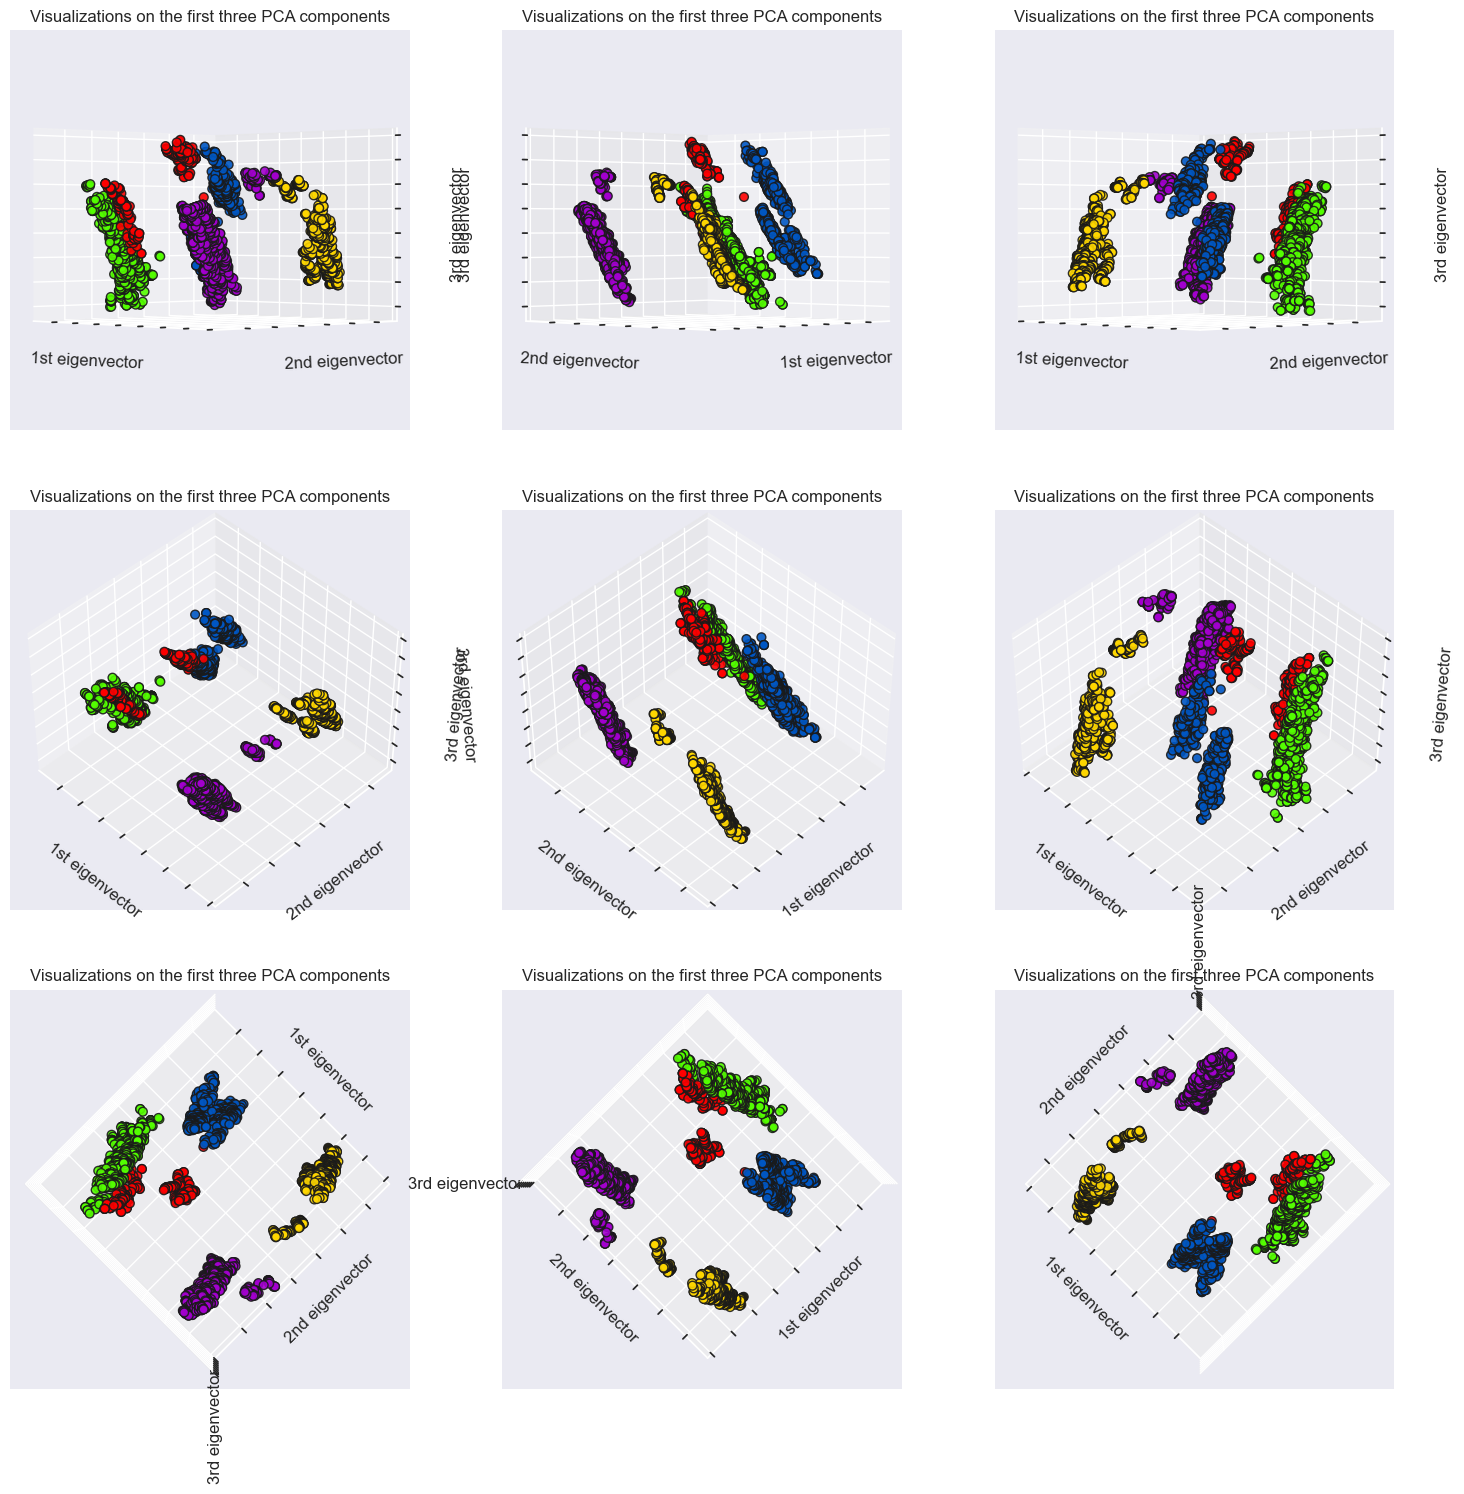

In [43]:
kmeans_visualization(df_stage1, 5)

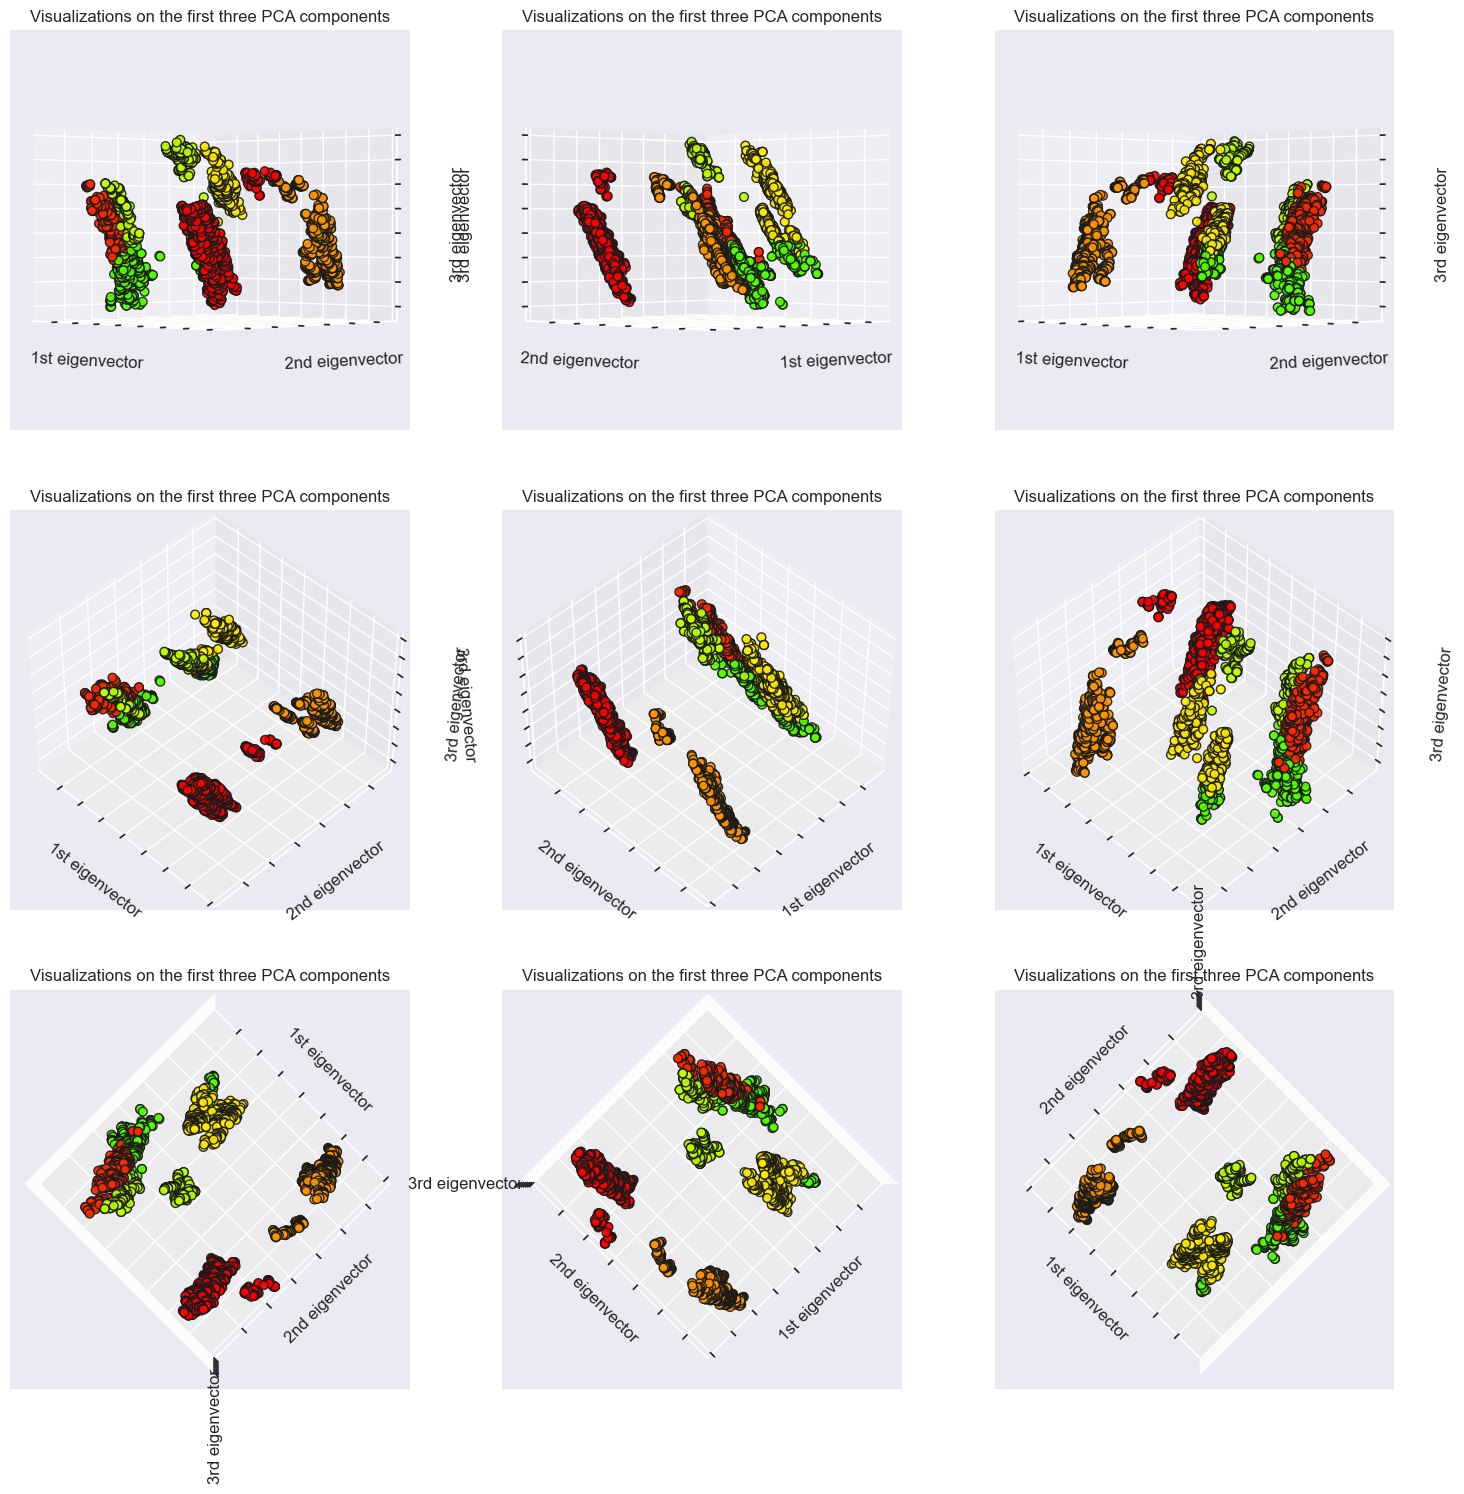

In [44]:
kmeans_visualization(df_stage1, 6)

# The homogeneity of k clusters

The Elbow Method suggests 4 clusters. Comparing to the visulizations shows in the previous section, k=4 is the most reasonable cluster number.

However, the Silhouette Score suggests k=5 insted of 4. But according to the evidence of the visualizations, k=4 shows the best homogeneity of cluster performance.

Therefore, The optimal cluster number k is 4, this is the best answer to this dataset if applying K-means.

In [45]:
from sklearn.metrics import silhouette_score

SIL = []
for i in range(2,16):
    kmeans = KMeans(n_clusters = i, random_state=0).fit(df_stage1)
    SIL.append(silhouette_score(df_stage1, kmeans.labels_))
idx = np.argmax(SIL)
a = np.vstack((range(2, 16), SIL))

The optimal cluster number is **5** due to the metric on Silhouette Score.


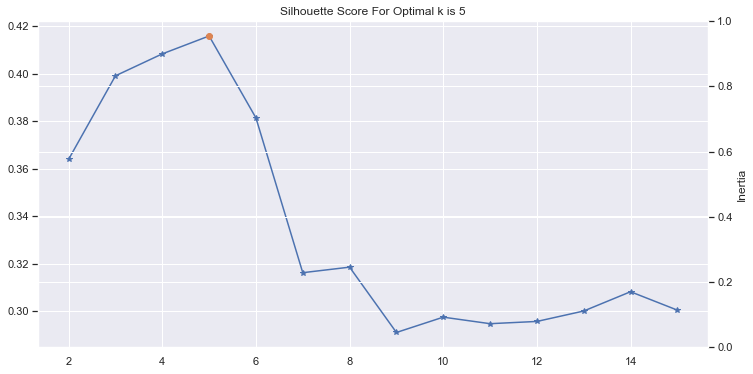

In [46]:
fig,ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.plot(a[0], a[1], marker="*")
ax1.plot(a[0][idx], a[1][idx], marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Silhouette Score For Optimal k is %s' % str(idx + 2))

print("The optimal cluster number is **%s** due to the metric on Silhouette Score." % str(idx + 2))

In [47]:
SSE = []
for i in range(2,16):
    kmeans = KMeans(n_clusters = i, random_state=0).fit(df_stage1)
    SSE.append(kmeans.inertia_)
    
from scipy.stats import linregress
a = np.vstack((range(2, 16), SSE))
a = np.concatenate((a.T, np.array([[a.T[-1][0] + 1, a.T[-1][1]]])), axis=0).T
t1 = a[:, :-1].T
t2 = a[:, 1:].T
slopes = [linregress(np.concatenate((np.array([t1[i]]), np.array([t2[i]])), axis=0).T)[0] for i in range(t1.shape[0])]
slope_diff = np.diff(slopes)
idx = np.argmax(slope_diff) + 1

The optimal cluster number is **4** due to the observation on elbow plot.


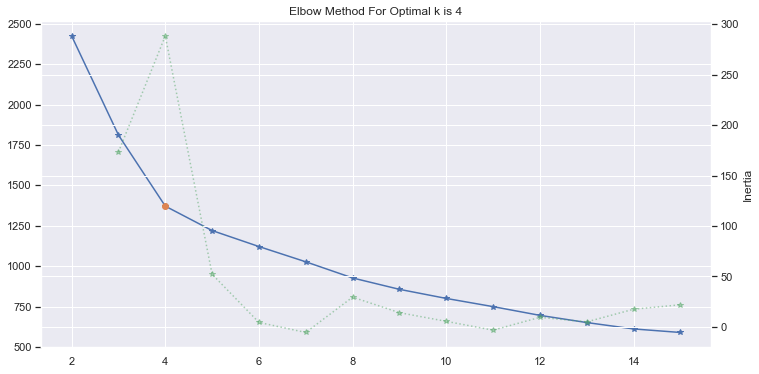

In [48]:
fig,ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.plot(a[:,:-1][0], a[:,:-1][1], marker="*")
ax2.plot(a[:,1:-1][0], slope_diff, c="g", marker="*", linestyle=":", alpha=0.5)
ax1.plot(a[0][idx], a[1][idx], marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k is %s' % str(idx + 2) )

print("The optimal cluster number is **%s** due to the observation on elbow plot." % str(idx + 2))